In [1]:
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_chr22 = pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/annotations/chr22_data.pkl")


In [3]:
adata = data_chr22.adata.copy()


In [20]:

sc.pp.scale(data_chr22.adata, max_value=10)

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [23]:
scdata

AnnData object with n_obs × n_vars = 1272489 × 32738
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pool', 'individual', 'percent.mt', 'latent', 'nCount_SCT', 'nFeature_SCT', 'cell_type', 'cell_label', 'sex', 'age'
    var: 'GeneSymbol', 'features', 'chromosome', 'start', 'end'

In [3]:
scdata =sc.read_h5ad("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/OneK1K_cohort_gene_expression_matrix_14_celltypes_w_gene_locations.h5ad.gz")


In [ ]:
# sc.tl.umap(adata)
# sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])
sc.pp.neighbors(adata, use_rep='X_pca')  # Ensure neighbors are computed only if necessary
sc.tl.umap(adata)

# Plot with cell type annotations
sc.pl.umap(adata, color='cell_type', title='UMAP by Cell Type')

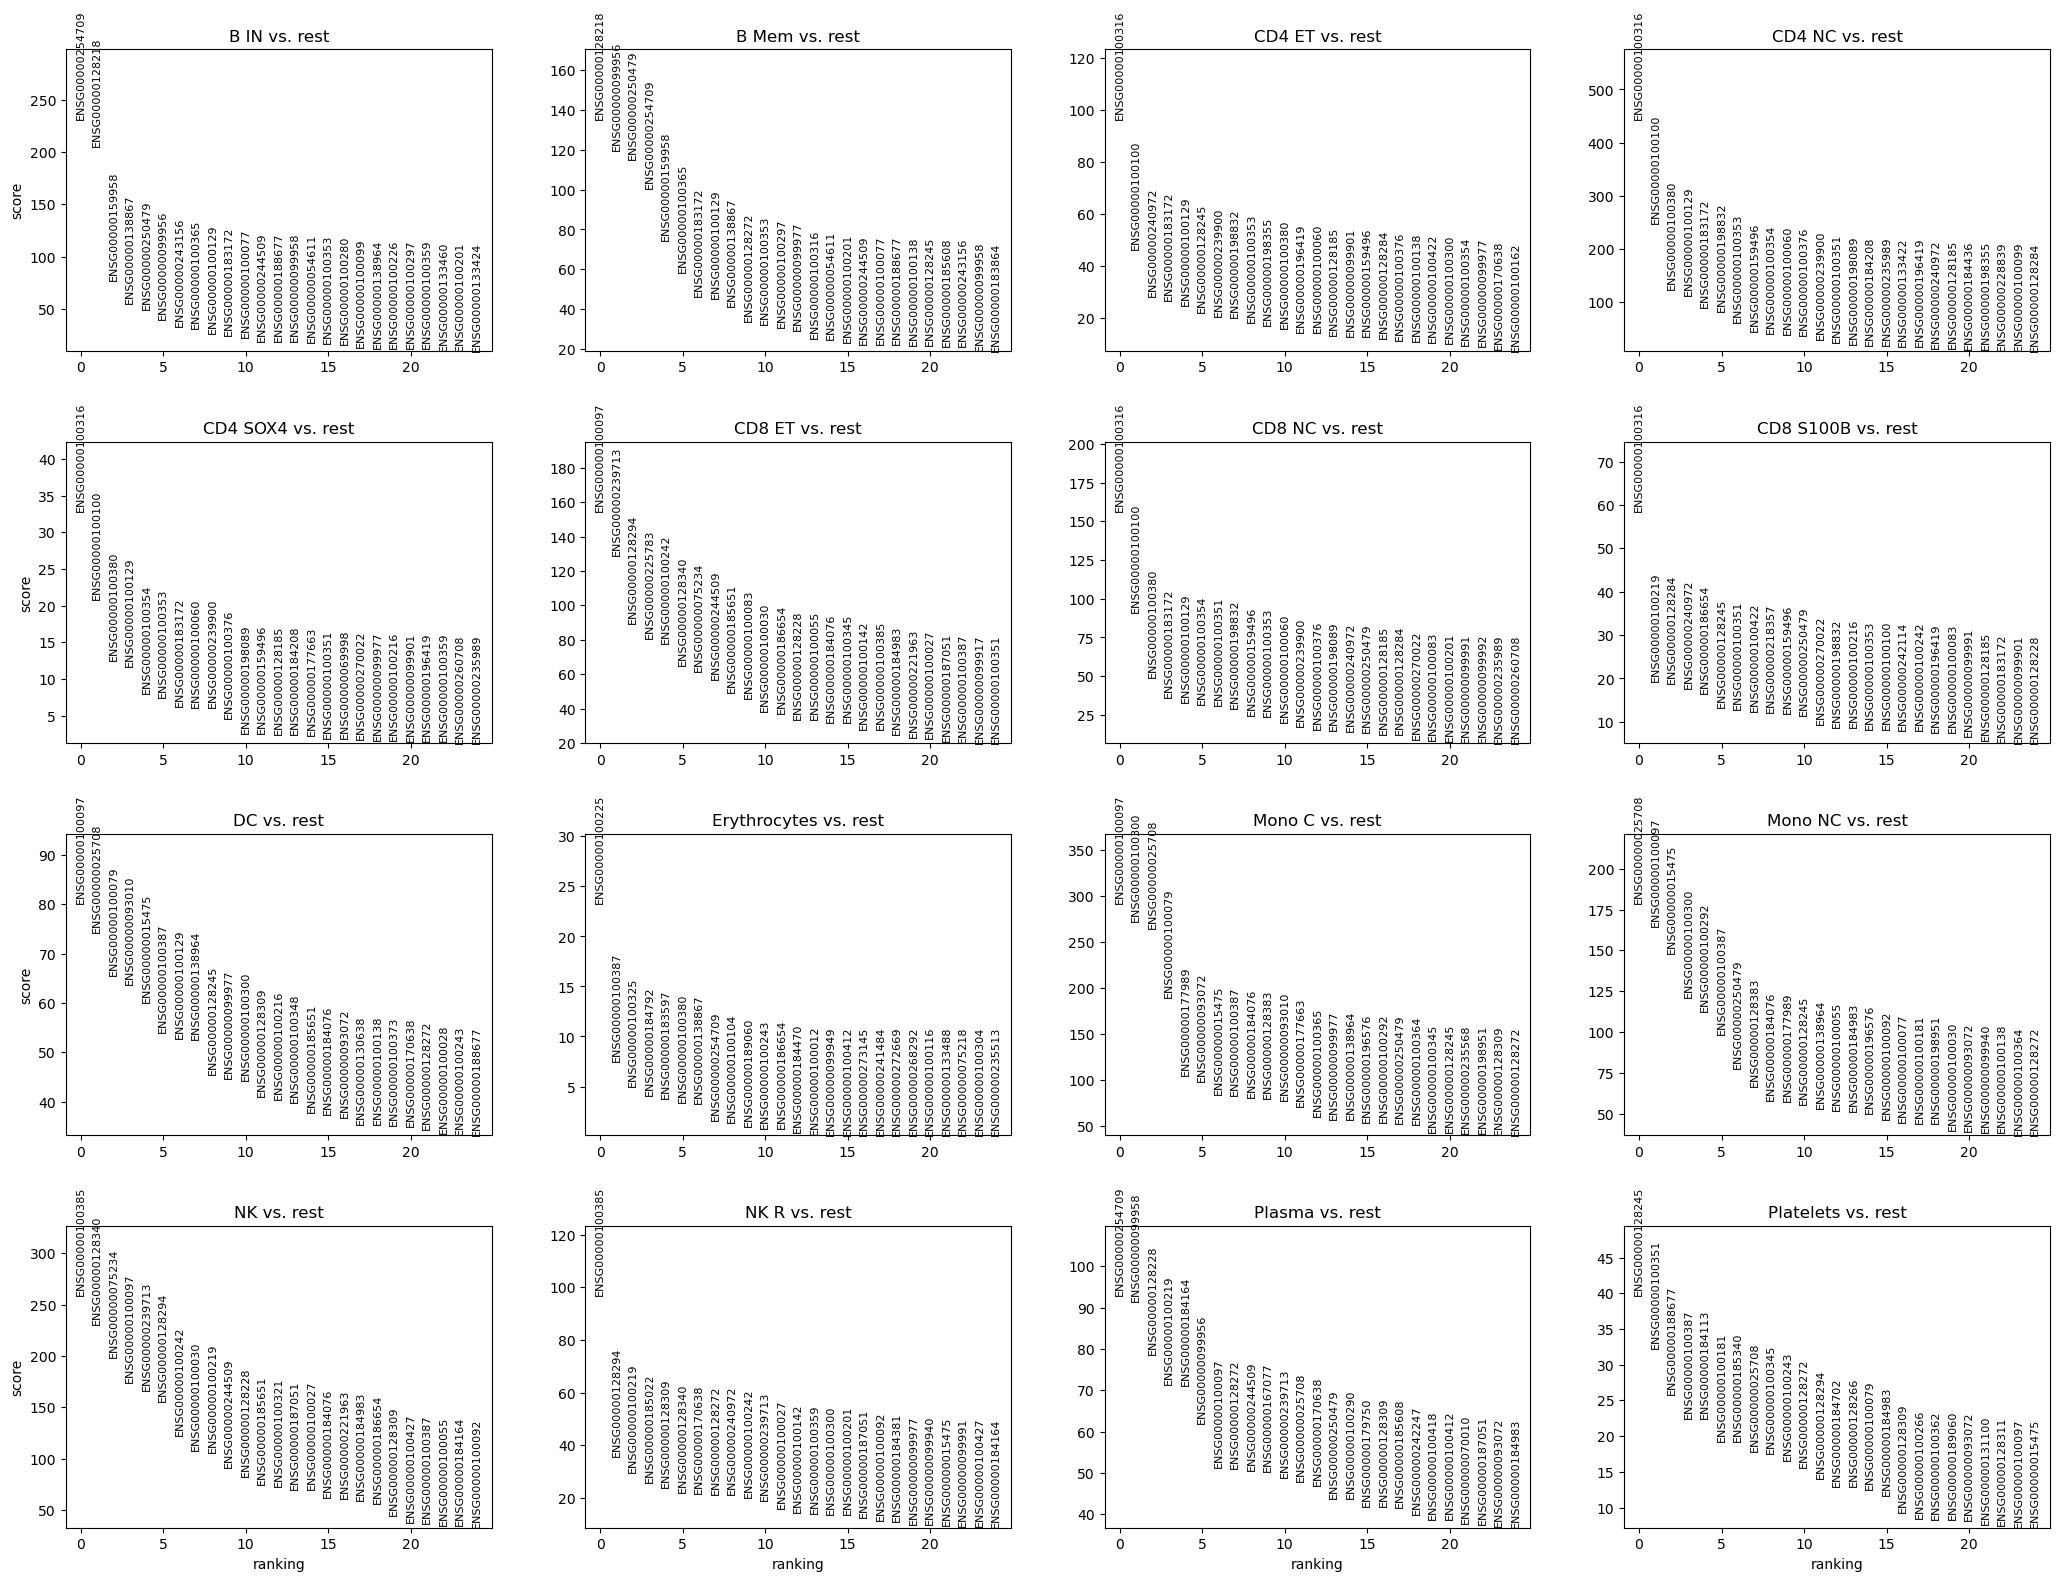

In [4]:

sc.tl.rank_genes_groups(adata, 'cell_label', method='wilcoxon') 
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


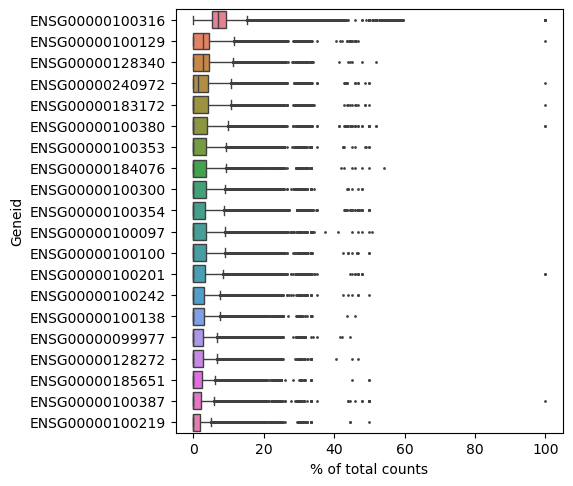

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [7]:
marker_genes = adata.uns['rank_genes_groups']
marker_genes_df = pd.DataFrame({
    group: marker_genes['names'][group] for group in marker_genes['names'].dtype.names
})
#print(marker_genes_df.head())

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 655 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


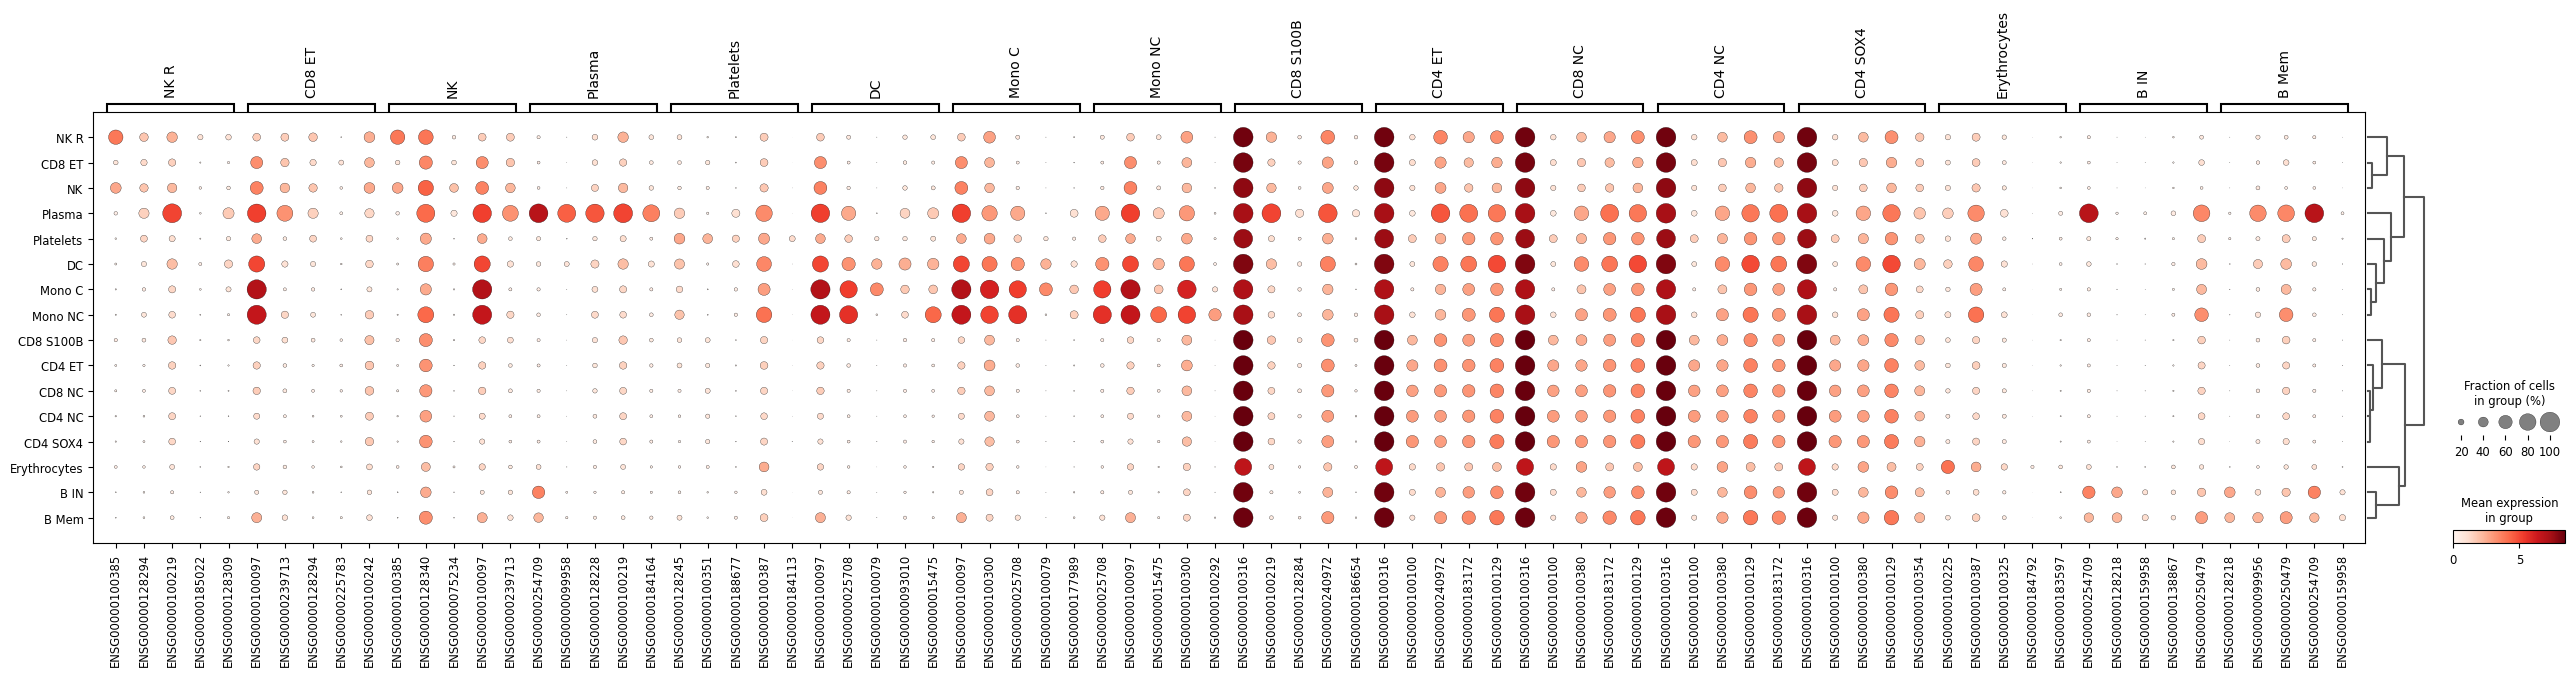

In [8]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)

In [5]:
top_genes = pd.DataFrame({
    group: adata.uns['rank_genes_groups']['names'][group][:3]
    for group in adata.uns['rank_genes_groups']['names'].dtype.names
})
top_3_markers=list(pd.unique((top_genes.values.ravel())))


In [6]:
top_genes

#sc.pl.violin(adata, top_3_markers, groupby='cell_label')

B IN            B Mem           CD4 ET           CD4 NC  \
0  ENSG00000254709  ENSG00000128218  ENSG00000100316  ENSG00000100316   
1  ENSG00000128218  ENSG00000099956  ENSG00000100100  ENSG00000100100   
2  ENSG00000159958  ENSG00000250479  ENSG00000240972  ENSG00000100380   

          CD4 SOX4           CD8 ET           CD8 NC        CD8 S100B  \
0  ENSG00000100316  ENSG00000100097  ENSG00000100316  ENSG00000100316   
1  ENSG00000100100  ENSG00000239713  ENSG00000100100  ENSG00000100219   
2  ENSG00000100380  ENSG00000128294  ENSG00000100380  ENSG00000128284   

                DC     Erythrocytes           Mono C          Mono NC  \
0  ENSG00000100097  ENSG00000100225  ENSG00000100097  ENSG00000025708   
1  ENSG00000025708  ENSG00000100387  ENSG00000100300  ENSG00000100097   
2  ENSG00000100079  ENSG00000100325  ENSG00000025708  ENSG00000015475   

                NK             NK R           Plasma        Platelets  
0  ENSG00000100385  ENSG00000100385  ENSG00000254709  ENSG00000128245  
1  ENSG00000128340  ENSG00000128294  ENSG00000099958  ENSG00000100351  
2  ENSG00000075234  ENSG00000100219  ENSG00000128228  ENSG00000188677